### Data Preprocessing

In [45]:
import pandas as pd
import numpy as np

In [2]:
dt_signal_3 = np.load('workspace/data/dt_signal_3.npy')

In [3]:
lb_list = np.load('workspace/data/lb_list.npy')

### Autoencoder

In [4]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# 평가 지표로 활용하기 위해서.
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [5]:
data = list(dt_signal_5)

In [6]:
label = list(lb_list)

In [7]:
label

[-1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [8]:
df = pd.DataFrame(data)

In [9]:
df['label'] = label

In [10]:
df_drop = df.dropna()

In [11]:
df_norm = df_drop[df_drop['label']==0]

In [12]:
df_ano = df_drop[df_drop['label']!=0]

In [13]:
df_norm

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
3,41.504200,39.924198,38.739300,37.554298,36.764400,35.579399,34.789501,33.209499,32.024601,30.839600,...,27.284800,26.889799,26.494801,26.494801,26.099800,26.099800,26.494801,26.099800,26.889799,0.0
4,23.334999,23.729900,24.124901,24.519899,26.889799,30.049700,34.789501,40.319199,46.638901,52.958698,...,25.309900,25.309900,24.914900,24.519899,24.519899,24.124901,24.124901,24.519899,24.914900,0.0
5,35.184399,34.789501,33.999500,32.419601,30.839600,29.259701,27.679800,26.099800,25.309900,24.124901,...,35.184399,33.999500,32.814499,30.839600,29.259701,28.074800,26.494801,25.704901,25.309900,0.0
6,27.679800,31.234600,36.764400,41.899200,48.218899,53.748600,57.698502,60.858299,62.043301,62.438301,...,23.729900,23.729900,23.729900,24.124901,25.704901,28.864700,32.419601,37.949299,44.269001,0.0
7,35.579399,34.394501,32.814499,31.234600,30.049700,28.469700,26.889799,26.494801,25.704901,25.309900,...,59.673401,59.673401,58.488400,57.303501,54.538601,52.168701,48.613899,45.848999,43.874100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,33.604500,35.184399,36.764400,38.344299,41.109200,43.084099,44.269001,45.058998,45.058998,44.664001,...,39.529301,38.344299,37.159401,36.764400,35.974400,35.974400,35.579399,35.579399,35.579399,0.0
640,35.974400,35.579399,35.184399,33.999500,32.814499,31.234600,30.049700,28.864700,28.469700,27.679800,...,44.269001,41.504200,38.739300,35.974400,33.209499,32.419601,32.024601,32.024601,32.024601,0.0
641,52.168701,50.193802,48.613899,45.453999,42.689098,39.924198,35.974400,34.394501,32.024601,31.629601,...,24.124901,24.124901,24.519899,24.124901,24.914900,25.704901,28.469700,30.839600,35.184399,0.0
642,31.629601,30.049700,29.654699,28.469700,28.074800,27.284800,26.889799,25.704901,24.519899,23.729900,...,23.334999,24.124901,24.124901,23.334999,22.940001,21.754999,20.570101,19.780100,19.385099,0.0


In [14]:
raw_data_norm = df_norm.values

In [15]:
raw_data_ano = df_ano.values

In [16]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

In [17]:
labels_ano = raw_data_ano[:, -1]
data_ano = raw_data_ano[:, 0:-1]

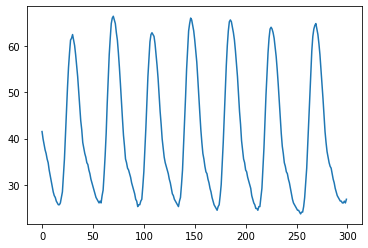

In [18]:
plt.plot(data[0])

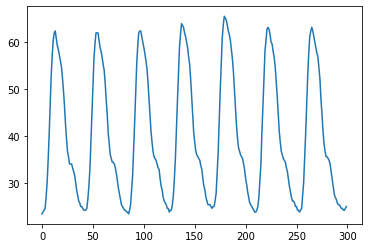

In [19]:
plt.plot(data[1])

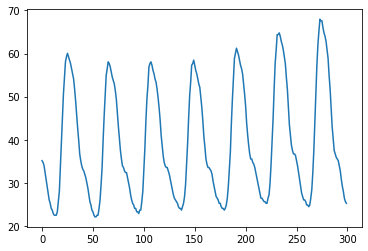

In [20]:
plt.plot(data[2])

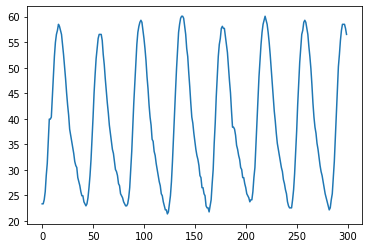

In [21]:
plt.plot(data_ano[0])

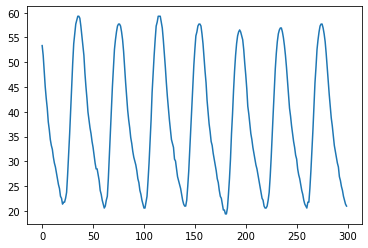

In [22]:
plt.plot(data_ano[1])

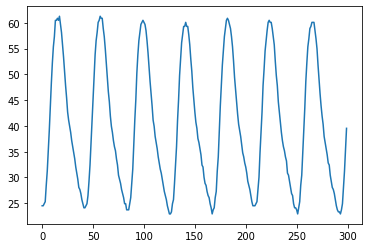

In [23]:
plt.plot(data_ano[2])

In [24]:
print(len(data), len(labels))

436 436


In [25]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [26]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(348, 300) (348,) (88, 300) (88,)


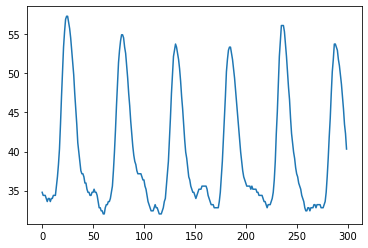

In [27]:
plt.plot(test_data[1])

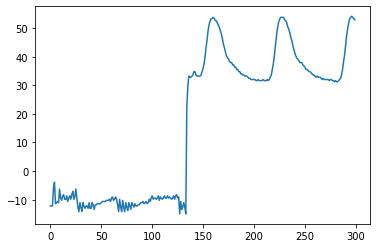

In [28]:
plt.plot(test_data[0])

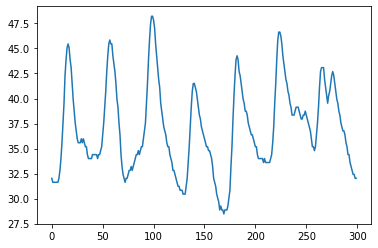

In [29]:
plt.plot(test_data[2])

In [30]:
     # minmaxnormalization
min_val = tf.reduce_min(train_data) 
# 최소값 
max_val = tf.reduce_max(train_data)
# 최대값
min_val_ano = tf.reduce_min(data_ano) 
# 최소값 
max_val_ano = tf.reduce_max(data_ano)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)
test_ano = (data_ano - min_val_ano) / (max_val_ano - data_ano)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
test_ano = tf.cast(test_ano, tf.float32)
# float32 형태로 변형

2022-11-18 08:30:17.771328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 08:30:17.774849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 08:30:17.774922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 08:30:17.775446: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [31]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(256, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(128, activation="relu"),
      layers.Dense(256, activation="relu"),
      layers.Dense(300, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()


In [32]:
autoencoder.compile(optimizer='adam', loss='mae')

In [33]:
history = autoencoder.fit(train_data, train_data, 
          epochs=300, 
          batch_size=64,
          validation_data=(test_data, test_data),
          shuffle=True)


Epoch 1/300
6/6 [==============================] - 1s 16ms/step - loss: 0.2898 - val_loss: 0.2674
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2095 - val_loss: 0.0985
Epoch 3/300
6/6 [==============================] - 0s 3ms/step - loss: 0.1124 - val_loss: 0.0779
Epoch 4/300
6/6 [==============================] - 0s 4ms/step - loss: 0.0670 - val_loss: 0.0591
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.0426
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0456 - val_loss: 0.0368
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0323
Epoch 8/300
1/6 [====>.........................] - ETA: 0s - loss: 0.0339

2022-11-18 08:30:19.071965: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


6/6 [==============================] - 0s 3ms/step - loss: 0.0361 - val_loss: 0.0335
Epoch 9/300
6/6 [==============================] - 0s 4ms/step - loss: 0.0352 - val_loss: 0.0314
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.0307
Epoch 11/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.0307
Epoch 12/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0339 - val_loss: 0.0304
Epoch 13/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.0302
Epoch 14/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.0304
Epoch 15/300
6/6 [==============================] - 0s 4ms/step - loss: 0.0337 - val_loss: 0.0307
Epoch 16/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.0303
Epoch 17/300
6/6 [==============================] - 0s 4ms/step - loss: 0.0339 - val_loss: 0.0302
Epoch 18/300
6/6 [================

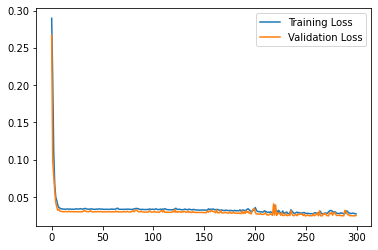

In [34]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [35]:
encoded_imgs = autoencoder.encoder(train_data).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

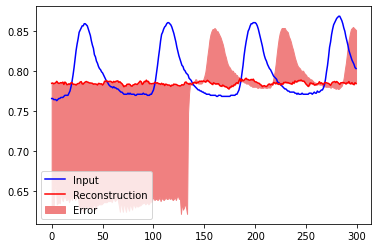

In [36]:
plt.plot(train_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

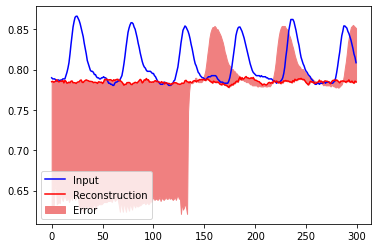

In [37]:
plt.plot(test_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

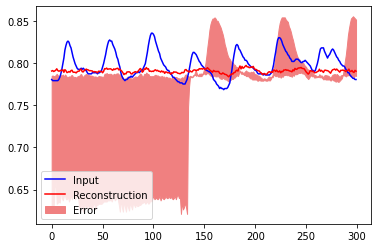

In [38]:
plt.plot(test_data[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

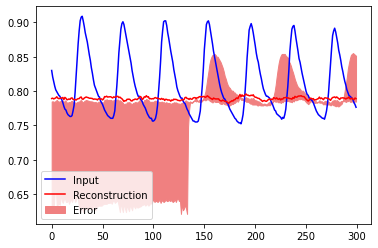

In [39]:
plt.plot(test_data[33], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[33], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

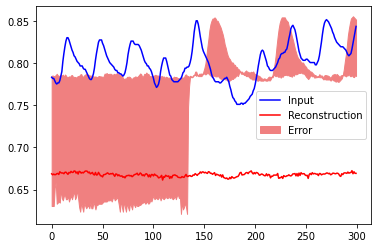

In [40]:
plt.plot(test_data[40], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[40], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

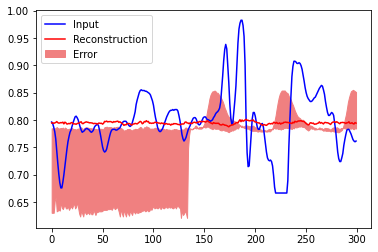

In [41]:
plt.plot(test_data[3], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[3], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

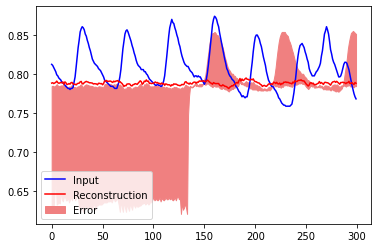

In [42]:
plt.plot(test_data[4], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[4], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [43]:
encoded_imgs = autoencoder.encoder(test_ano).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

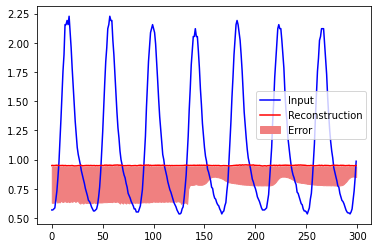

In [44]:
plt.plot(test_ano[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(300), decoded_imgs[0], test_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()